# 导入库，导入数据

In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/86156/Desktop/生产实习/原始数据/study_information.csv',
                header=None,
                parse_dates=[2])
data.columns=['uid','cid','time','progress','price']

# 准备好数据后筛选属性

## 课程新旧

In [2]:
#计算相差天数
data['days']=data['time'].max()-data['time']
#提取天数信息
data['days']=data['days'].dt.days
ans1=data.groupby('cid')[['days']].max()

## 课程平均进度

In [3]:
def fun2(x):
    return int(x.split(':')[1].replace('%;',''))
data['学习进度_数字']=data['progress'].map(fun2)
ans3=data.groupby('cid')[['学习进度_数字']].mean()

## 课程平均售价

In [4]:
ans2=data.groupby('cid')[['price']].mean()
ans2.fillna(value=0,inplace=True)

## 课程销量

In [5]:
ans4=data.groupby('cid')[['uid']].count()

# 特征合并

## 教学代码

In [6]:
#合并ans1,ans2
#行索引一样的数据，用concat
#concat可以放多个变量
ans=pd.concat((ans1,ans2),axis=1)
#axis=1控制按行合并
ans=pd.concat((ans,ans3),axis=1)
ans=pd.concat((ans,ans4),axis=1)
ans

,days,price,学习进度_数字,uid
cid,,,,
课程0,51,199.0,0.000000,2
课程1,58,199.0,0.000000,4
课程10,135,0.0,0.000000,35
课程100,39,199.0,0.000000,5
课程101,406,0.0,53.475104,482
...,...,...,...,...
课程95,536,499.0,5.565217,115
课程96,419,0.0,7.224670,227
课程97,419,29.0,8.156425,179


In [7]:
#用merge合并，只要有值一样就行，按照值合并
#merge一次只能放两个变量
pd.merge(ans1,ans2,
        left_index=True,right_index=True,#指定连接数据为两个行索引
        )

,days,price
cid,,
课程0,51,199.0
课程1,58,199.0
课程10,135,0.0
课程100,39,199.0
课程101,406,0.0
...,...,...
课程95,536,499.0
课程96,419,0.0
课程97,419,29.0


In [8]:
pd.merge(data,ans1,
        left_on='cid',right_index=True,#指定连接数据为两个行索引
         suffixes=('_间隔','_最大值'),#设置后缀，取分两个数据中相同名字的列
        )

,uid,cid,time,progress,price,days_间隔,学习进度_数字,days_最大值
0,用户3,课程106,2020-04-21 10:11:50,width: 0%;,0.0,57,0,83
1972,用户296,课程106,2020-04-05 19:55:36,width: 0%;,0.0,73,0,83
7580,用户2160,课程106,2020-04-13 15:13:04,width: 100%;,0.0,65,100,83
8029,用户2394,课程106,2020-04-18 00:23:13,width: 0%;,0.0,61,0,83
11982,用户4129,课程106,2020-04-29 20:04:07,width: 0%;,0.0,49,0,83
...,...,...,...,...,...,...,...,...
176350,用户38324,课程79,2020-04-27 11:17:44,width: 100%;,0.0,51,100,51
176356,用户38325,课程79,2020-04-27 11:17:44,width: 100%;,0.0,51,100,51
176362,用户38326,课程79,2020-04-27 11:17:44,width: 0%;,0.0,51,0,51
176368,用户38327,课程79,2020-04-27 11:17:44,width: 100%;,0.0,51,100,51


## 项目代码

In [9]:
ans=pd.concat((ans1,ans2,ans3,ans4),axis=1)
ans.isnull().sum()#检查是否有空数据

days       0
price      0
学习进度_数字    0
uid        0
dtype: int64

In [10]:
#检查数据是否正常
ans.describe()

,days,price,学习进度_数字,uid
count,241.000000,241.000000,241.000000,241.000000
mean,285.887967,199.215768,20.155177,809.020747
std,221.234886,432.364674,25.008135,1751.486289
min,5.000000,0.000000,0.000000,1.000000
25%,62.000000,0.000000,0.406964,19.000000
50%,246.000000,79.000000,11.213018,138.000000
75%,529.000000,199.000000,26.804979,478.000000
max,646.000000,3000.000000,93.871324,13265.000000


# 数据标准化

In [11]:
from sklearn.preprocessing import MinMaxScaler
MMmodel=MinMaxScaler()
mm_data=MMmodel.fit_transform(ans)

# 聚类

In [12]:
from sklearn.cluster import KMeans
model=KMeans(4).fit(mm_data)
#查看聚类结果
model.labels_

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2,
       3, 2, 2, 0, 1, 0, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 2, 0, 2, 2, 3, 3, 1, 0, 1, 0, 0, 3, 1, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3,
       3, 2, 0, 3, 2, 1, 0, 1, 0, 3, 2, 0, 0, 0, 2, 3, 2, 2, 2, 2, 2, 3,
       3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 3, 3, 1, 2, 3, 3, 3, 0, 3,
       1, 0, 3, 0, 3, 3, 3, 3, 1, 0, 1, 1, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 2, 2, 3, 2, 3, 3, 0, 2, 3, 1, 3, 2, 2, 3,
       0, 0, 0, 0, 0, 3, 3, 3, 0, 2, 0, 0, 2, 0, 3, 3, 3, 3, 3, 3, 3])

In [13]:
#查看聚类中心
model.cluster_centers_

array([[0.11911898, 0.07467982, 0.07652614, 0.01517166],
       [0.47562402, 0.05425   , 0.10604072, 0.32924881],
       [0.15147825, 0.1258374 , 0.72444068, 0.01599598],
       [0.81655701, 0.03731159, 0.13949913, 0.02539646]])

# 雷达图

## 可视化第一种方法

In [18]:
from pyecharts import options as opts
from pyecharts.charts import Radar
# 虚假数据
data=model.cluster_centers_.tolist()
radar=(Radar()
      .add_schema(schema=[
          opts.RadarIndicatorItem(name="课程时间",max_=1),
          opts.RadarIndicatorItem(name="课程价格",max_=1),
          opts.RadarIndicatorItem(name="平均进度",max_=1),
          opts.RadarIndicatorItem(name="销售数量",max_=1),
      ]
)
      .add('',data)
)
radar.render()
#返回的是地址，根据地址可以找到图
#非常好看且好用，但是逻辑基于java，操作较为复杂

'C:\\Users\\86156\\Desktop\\生产实习\\render.html'

## matplotlib

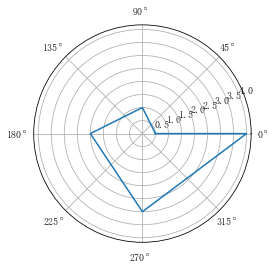

In [23]:
import matplotlib.pyplot as plt
import numpy as np
#中文和符号的正常显示
plt.rcParams['font.family']='youyuan'
plt.rcParams['axes.unicode_minus']=False
#创建一个画布
fig=plt.figure()
ax=fig.add_subplot(1,1,1,#一行一列第一个
                   polar=True)#这里一定要设置成极坐标格式
x=np.linspace(0,2*np.pi,5).tolist()
x.append(0)
plt.plot(x,[0.5,1,2,3,4,0.5])

([<matplotlib.projections.polar.ThetaTick at 0x23ec9f78dc0>,
 [Text(0.0, 0, '课程时间'),
  Text(1.5707963267948966, 0, '课程价格'),
  Text(3.141592653589793, 0, '平均进度'),
  Text(4.71238898038469, 0, '销售数量'),
  Text(6.283185307179586, 0, '课程时间')])

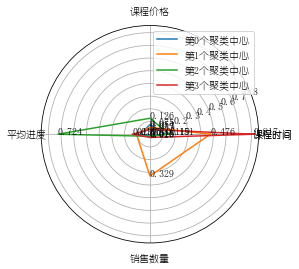

In [32]:
#创建一个画布
fig=plt.figure()
ax=fig.add_subplot(1,1,1,#一行一列第一个
                   polar=True)#这里一定要设置成极坐标格式
#聚类中心数据
data=model.cluster_centers_.tolist()
#把圆均分
x=np.linspace(0,2*np.pi,5).tolist()
#依次绘制雷达图
for i in range(4):
    #将聚类中心的数第一个重复一次，让曲线可以回到开头
    data[i].append(data[i][0])
    #绘制雷达图像
    plt.plot(x,data[i],label=f'第{i}个聚类中心')
    #给每个点添加标签数据
    for j in range(4):
        plt.text(x[j],data[i][j],np.round(data[i][j],3))
#显示图例
plt.legend()
ax.grid(True)
#加标签
plt.xticks(x,['课程时间','课程价格','平均进度','销售数量','课程时间'])